In [148]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier

In [149]:
# Load the data
df = pd.read_csv('./customer_churn.csv')

In [150]:
# Drop customerID column
df.drop('customerID', axis='columns', inplace=True)

In [151]:
# Convert TotalCharges to numeric, handling non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [152]:
# Remove rows with NaN values in TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

In [154]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [155]:
# Split data into features (X) and target (y)
X = df.drop('Churn', axis='columns')
y = df['Churn']

In [156]:
# Normalize/Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [157]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
# Build the model
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(26, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [159]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [160]:
# Train the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.6976 - loss: 0.5763 
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.7872 - loss: 0.4451
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.8037 - loss: 0.4210
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.8015 - loss: 0.4192
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.8124 - loss: 0.3972
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.8149 - loss: 0.3984
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.8169 - loss: 0.3971
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.8050 - loss: 0.4089
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.8160 - loss: 0.3964
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.8106 - loss: 0.4075
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.8172 - loss: 0.3924
Epoch 12/100
176/1

In [161]:
# Evaluate the model
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.7778 - loss: 0.4982


[0.5127471685409546, 0.778251588344574]

In [162]:
# Predictions
yp = model.predict(X_test)
y_pred = [1 if element > 0.5 else 0 for element in yp]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


In [163]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [164]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[908, 125],
       [187, 187]])

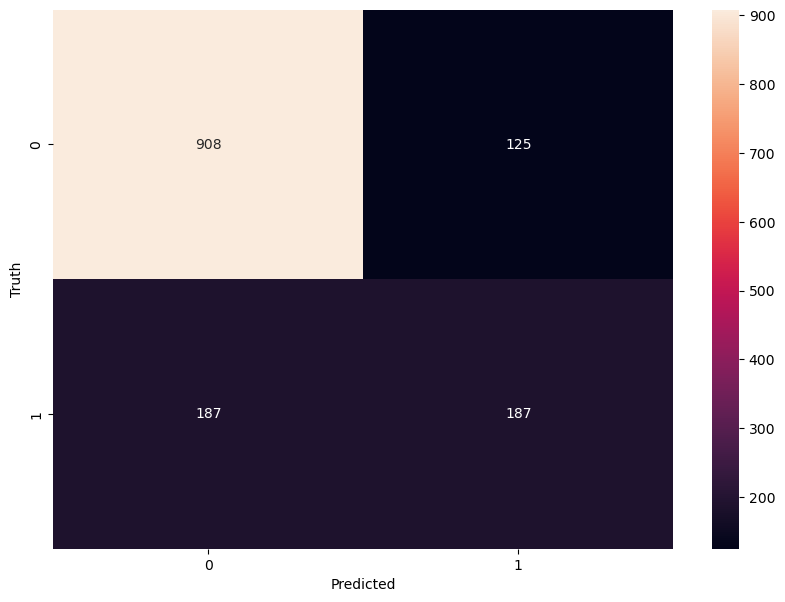

In [165]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [146]:
# Performance metrics
accuracy = round((cm[0,0] + cm[1,1]) / np.sum(cm), 2)
precision_no = round(cm[0,0] / (cm[0,0] + cm[1,0]), 2)
precision_yes = round(cm[1,1] / (cm[1,1] + cm[0,1]), 2)
recall_no = round(cm[0,0] / (cm[0,0] + cm[0,1]), 2)
recall_yes = round(cm[1,1] / (cm[1,1] + cm[1,0]), 2)

print(f"Accuracy: {accuracy}")
print(f"Precision (No churn): {precision_no}")
print(f"Precision (Churn): {precision_yes}")
print(f"Recall (No churn): {recall_no}")
print(f"Recall (Churn): {recall_yes}")

Accuracy: 0.78
Precision (No churn): 0.81
Precision (Churn): 0.64
Recall (No churn): 0.91
Recall (Churn): 0.43
